# Исследование данных сервиса аренды самокатов GoFast

В нашем распоряжении данные о некоторых пользователях популярного сервиса аренды самокатов GoFast из нескольких городов, а также об их поездках. 

Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.


Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 

Сервисом можно пользоваться:

 - без подписки
 
     - абонентская плата отсутствует;
     
     - стоимость одной минуты поездки — 8 рублей;
     
     - стоимость старта (начала поездки) — 50 рублей;


 - с подпиской Ultra
 
     - абонентская - 199 рублей в месяц;
     
     - стоимость одной минуты поездки — 6 рублей;
     
     - стоимость старта (начала поездки) — бесплатно.


**Описание данных:**

Файл `users_go.csv` содержит данные о пользователях:

  - `user_id` - уникальный идентификатор пользователя;
  - `name` - имя пользователя;
  - `age` - возраст;
  - `city` - город; 
  - `subscription_type` - тип подписки (free, ultra).
  
  
Файл `rides_go.csv` содержит данные о поездках:  
 
  - `user_id` - уникальный идентификатор пользователя;
  - `distance` - расстояние, которое пользователь проехал в текущей сессии (в метрах);
  - `duration` - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»;
  - `date` - дата совершения поездки.
 
 
Файл `subscriptions_go.csv` содержит данные о подписках:

  - `subscription_type` - тип подписки;
  - `minute_price` - стоимость одной минуты поездки по данной подписке;
  - `start_ride_price` - стоимость начала поездки;
  - `subscription_fee` - стоимость ежемесячного платежа. 

**Ход исследования:**

 1. Обзор данных.
 
 2. Предобработка данных. 
 
 3.  Исследовательский анализ данных.
 
 4. Объединение данных.
 
 5.  Подсчёт выручки.
 
 6. Проверка гипотез.
 
 7. Распределения.
 
 8. Выводы.

## Обзор данных.

In [1]:
#Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from scipy.stats import poisson
import matplotlib as mpl
from math import factorial
from scipy.stats import binom
import math
from math import sqrt
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Задаем единый стиль для оформления графиков
plt.style.use('fivethirtyeight')
mpl.rcParams['font.size'] = 8
mpl.rcParams['grid.color'] = "lightgray" #устанавливаем цвет сетки на графиках

In [3]:
#Прочитаем файлы и сохраним их в переменные users, rides, subs
try:
    users = pd.read_csv('/datasets/users_go.csv')
except:
    users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
try:
    rides = pd.read_csv('/datasets/rides_go.csv')
except:
    rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv') 
try:
    subs = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    subs = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')    

In [4]:
#Получим общую информацию о датасете users, выведем первые 5 строк 
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


Таблица с данными о пользователях содержит 5 столбцов и 1565 строк, пропуски отсутствуют, типы данных соответствуют содержанию столбцов.

In [6]:
#Получим общую информацию о датасете rides, выведем первые 5 строк 
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


Таблица с данными о поездках содержит 4 столбца и 18068 строк, пропуски отсутствуют. Столбец `date` содержит дату в текстовом формате, в дальнейшем необходимо привести к типу данных `datetime`.

In [8]:
#Получим общую информацию о датасете subs, выведем первые 5 строк 
subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [9]:
subs

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Таблица с данными о подписках содержит 4 столбца и всего 2 строки, пропуски отсутствуют, типы данных соответствуют содержанию столбцов. 

**Вывод:** Произведено первичное ознакомление с данными. 

Таблица `users` с данными о пользователях содержит 5 столбцов и 1565 строк, пропуски отсутствуют, типы данных соответствуют содержанию столбцов.

Таблица `rides` с данными о поездках содержит 4 столбца и 18068 строк, пропуски отсутствуют. Столбец date содержит дату в текстовом формате, в дальнейшем необходимо привести к типу данных datetime.

Таблица `subs` с данными о подписках содержит 4 столбца и всего 2 строки, пропуски отсутствуют, типы данных соответствуют содержанию столбцов.

## Предобработка данных.

In [10]:
#Приведем столбец date к типу даты и проверим изменения

In [11]:
rides['date'] = pd.to_datetime(rides['date'])
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [12]:
#Создадим новый столбец month с номером месяца на основе столбца date и проверим изменения

In [13]:
rides['month'] = pd.DatetimeIndex(rides['date']).month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [14]:
#Проверим данные на наличие дубликатов

In [15]:
users.duplicated().sum()

31

Таблица `users` содержит 31 дубликат, удалим такие строки и проверим произведенные изменения. 

In [16]:
users = users.drop_duplicates()
users.duplicated().sum()

0

In [17]:
rides.duplicated().sum()

0

В таблице `rides` дубликаты отсутствуют.

In [18]:
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


**Вывод:**
Произведена предобработка данных. 
Столбец `date` приведен к типу даты, на основе указанного столбца создан столбец `month`, содержащий номер месяца.
Обработаны дубликаты в таблице `users`, в остальных датасетах дубликаты отсутствуют.

## Исследовательский анализ данных.

### Описание и визуализация общей информации о частоте встречаемости городов.

In [19]:
#Построим таблицу частот и посмотрим на частоту встречаемости городов

In [20]:
users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

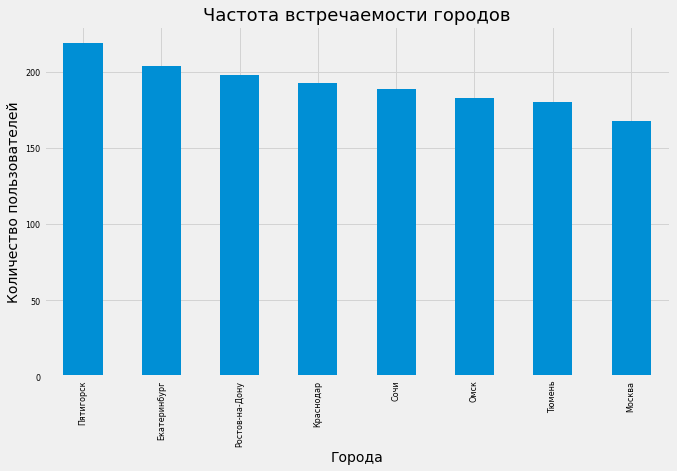

In [21]:
#Строим столбчатую диаграмму для категориальных переменных
ax = users['city'].value_counts().plot.bar(figsize=(10, 6))
plt.xlabel('Города', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.title('Частота встречаемости городов', fontsize=18)
plt.show()

**Наиболее** популярен среди пользователей **Пятигорск - 219 человек** пользуются самокатами компании GoFast в этом городе-курорте. Незначительно отстают от Пятигорска города **Екатеринбург** и **Ростов-На-Дону: 204 и 198 пользователей**. Наименее популярна **Москва - 168 человек** используют в качестве передвижения или прогулок по городу. Среди представленных городов также присутствуют: **Краснодар, Сочи, Омск и Тюмень**. 

### Соотношение пользователей с подпиской и без подписки. 

In [22]:
#Посчитаем количественное соотношение пользователей с подпиской и без
rates = users.pivot_table(index='subscription_type', values='user_id', aggfunc='nunique')
rates

,user_id
subscription_type,
free,835
ultra,699


In [23]:
# Встроенная схема цветов
#colors = plt.cm.Paired(range(len(rates)))

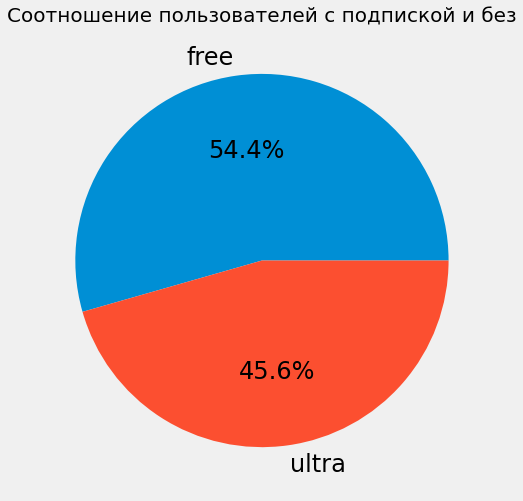

In [24]:
#Построим pie chart, визуализируем соотношение пользователей.
rates.plot(y='user_id', kind='pie', figsize=(8,8), autopct='%1.1f%%', textprops={'fontsize': 24});
plt.ylabel('')  # Удаляем подпись оси y
plt.legend().remove()
plt.title('Соотношение пользователей с подпиской и без', fontsize=20)  # Добавляем заголовок
plt.show()

Очевидно, преобладающее большинство пользователей без подписки: 54.4% (или 835 человек). Подпиской пользуются 45.6% или 699 человек.

### Распределение пользователей по возрасту

In [25]:
#Посчитаем, сколько всего уникальных пользователей приложения

In [26]:
users['user_id'].nunique()

1534

Мы обладаем данными о 1534 пользователях приложения. 

In [27]:
#Посмотрим, как пользователи распределяются по количеству в зависимости от возраста
age = users['age'].value_counts()
age

25    145
24    132
26    131
23    129
27    119
22    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
34     19
16     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64

Визуализируем распределение пользователей по возрасту. Построим гистограмму и диаграмму размаха.

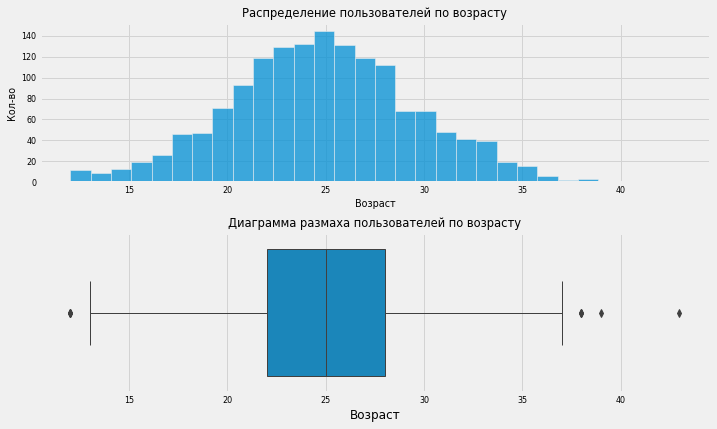

In [28]:
#Задаём сетку отрисовки графиков
plt.figure(figsize=(10, 6))

#Строим гистограмму распределения
ax1 = plt.subplot(2, 1, 1) 
#users['age'].hist(bins=15, ax=ax1)
sns.histplot(users['age'], ax=ax1)
plt.xlabel('Возраст')
plt.ylabel('Кол-во')
plt.title('Распределение пользователей по возрасту')

# строим график распределения значений
ax2 = plt.subplot(2, 1, 2) 
sns.boxplot(x='age', data=users, ax=ax2, linewidth=1)
plt.title('Диаграмма размаха пользователей по возрасту')
plt.xlabel('Возраст', fontsize=12)

plt.tight_layout()  #Команда для улучшения компоновки графиков
plt.show()

In [29]:
# Выведем список характерных значений
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

**Вывод:** На гистограмме наблюдается характерный для нормального распределения колокол. Большинство пользователей в возрасте от 22 до 28 лет, что соответствует границам первого и третьего квартилей. Половина пользователей самокатов в компании GoFast младше 25 лет, а другая половина старше 25 лет. Минимальный возраст пользователя 12 лет, максимальный возраст 43 года. Самый распространненный возраст пользователя - 25 лет, таких клиентов 145 человек, что составляет 9.5% от всех уникальных пользователей приложения.

### Расстояние, преодолеваемое пользователем за поездку. 

In [30]:
rides.head(3)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4


In [31]:
#Посмотрим на список характерных значений
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Для всех поездок визуализируем распределение значений для расстояний, преодолеваемых пользователями за поездку.

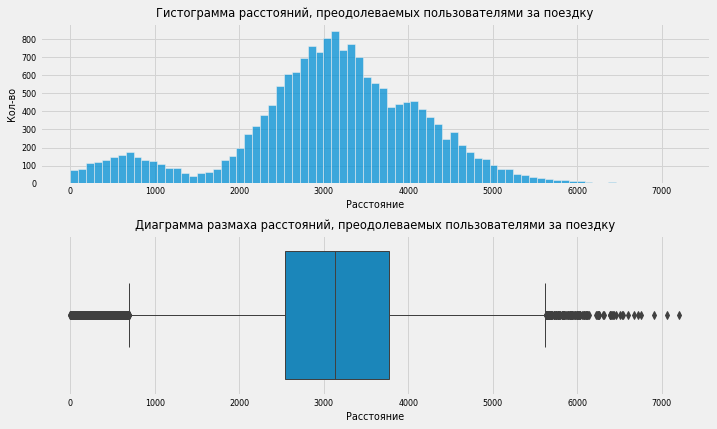

In [32]:
#Задаём сетку отрисовки графиков
plt.figure(figsize=(10, 6))

#Строим гистограмму распределения
ax1 = plt.subplot(2, 1, 1) 
#rides['distance'].hist(bins=15, ax=ax1) 
sns.histplot(rides['distance'], ax=ax1);
plt.xlabel('Расстояние')
plt.ylabel('Кол-во')
plt.title('Гистограмма расстояний, преодолеваемых пользователями за поездку')

# строим график распределения значений
ax2 = plt.subplot(2, 1, 2) 
sns.boxplot(x='distance', data=rides, ax=ax2, linewidth=1)
plt.title('Диаграмма размаха расстояний, преодолеваемых пользователями за поездку')
plt.xlabel('Расстояние')

plt.tight_layout()  #Команда для улучшения компоновки графиков
plt.show()

Большинство поездок лежит в диапазоне от 2500 метров до 3700 метров, что соответствует границам первого и третьего квартилей. В среднем, расстояние, преодолеваемое пользователем составляет 3 км (или 3070 метров). Минимальное расстояние, преодолеваемое пользователем составляет менее метра (вероятно, речь идет о неисправном самокате, либо пользователь передумал). Максимальное расстояние, которое пользователь проехал составило 7 км и 200 метров, однако свыше 5.5 км поездки достаточно редки, и их количество незначительно, как и поездки на расстояния менее 750 метров (хотя очень короткие поездки случаются немного чаще, чем наиболее дальние).

Для каждого пользователя посчитаем среднее и медианное расстояние, преодолеваемое за поездку. 

In [33]:
user_distance = rides.pivot_table(index='user_id', values='distance', aggfunc=('mean', 'median'))
user_distance

,mean,median
user_id,,
1,2839.181839,2806.504429
2,3087.641692,3105.086678
3,3075.633155,2858.693148
4,3202.656423,3373.276987
5,3232.449968,3244.021903
...,...,...
1530,2750.498225,2724.331740
1531,2915.425836,2999.913238
1532,2607.861784,2615.477834


In [34]:
user_distance.describe()

,mean,median
count,1534.000000,1534.000000
mean,3077.296650,3134.108236
std,327.624403,346.362860
min,1630.788427,1234.763317
25%,2882.505704,2916.315439
50%,3090.864050,3131.071202
75%,3293.325678,3337.730942
max,4287.519387,4395.430303


В данных присутствуют выбросы, но их незначительное количество. В столбце характерных значений среднего расстояния для каждого пользователя параметры медианы и среднего стремятся друг к другу. Для визуализации используем среднее расстояние, преодолеваемое каждым пользователем. 

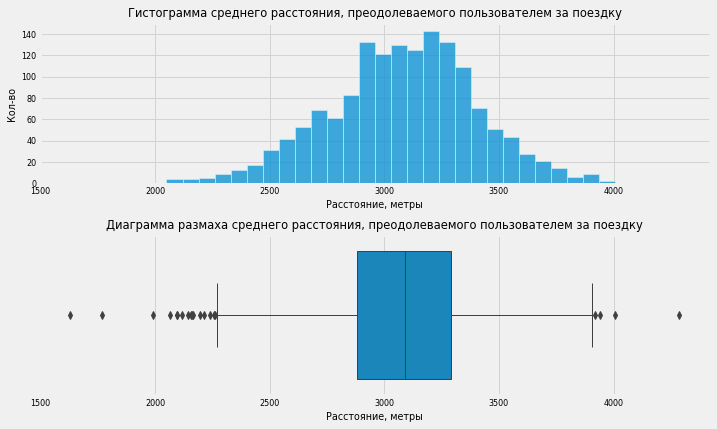

In [35]:
#Задаём сетку отрисовки графиков
plt.figure(figsize=(10, 6))

#Строим гистограмму распределения
ax1 = plt.subplot(2, 1, 1) 
sns.histplot(user_distance['mean'], ax=ax1);
plt.xlabel('Расстояние, метры')
plt.ylabel('Кол-во')
plt.title('Гистограмма среднего расстояния, преодолеваемого пользователем за поездку')

# строим график распределения значений
ax2 = plt.subplot(2, 1, 2) 
sns.boxplot(x='mean', data=user_distance, ax=ax2, linewidth=1)
plt.title('Диаграмма размаха среднего расстояния, преодолеваемого пользователем за поездку')
plt.xlabel('Расстояние, метры')

plt.tight_layout()  #Команда для улучшения компоновки графиков
plt.show()

Для каждого пользователя посчитано среднее преодолеваемое расстояние за поездку. Большинство значений среднего расстояния для пользователя лежат в диапазоне примерно от 2900 до 3300 метров. То есть, большинство пользователей в среднем проезжают от 2900 до 3300 метров за поездку. Минимальное среднее расстояние для пользователя составляет 1630 метрв, а максимальное среднее расстояние для пользователя составляет 4287 метра. Значения среднего расстояния для пользователя менее 2500 метров и свыше 3800 метров достаточно редки.

### Продолжительность поездок.

In [36]:
#Посмотрим на список характерных значений для столбца duration

In [37]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

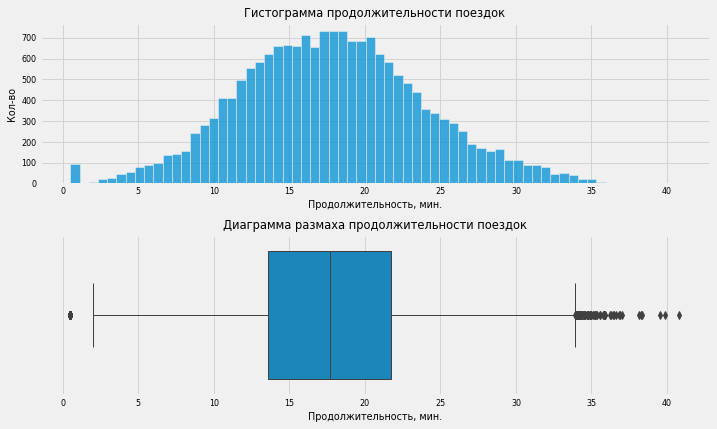

In [38]:
#Задаём сетку отрисовки графиков
plt.figure(figsize=(10, 6))

#Строим гистограмму распределения
ax1 = plt.subplot(2, 1, 1) 

sns.histplot(rides['duration'], ax=ax1);
plt.xlabel('Продолжительность, мин.')
plt.ylabel('Кол-во')
plt.title('Гистограмма продолжительности поездок')

# строим график распределения значений
ax2 = plt.subplot(2, 1, 2) 
sns.boxplot(x='duration', data=rides, ax=ax2, linewidth=1)
plt.title('Диаграмма размаха продолжительности поездок')
plt.xlabel('Продолжительность, мин.')

plt.tight_layout()  #Команда для улучшения компоновки графиков
plt.show()

Медиана и среднее значение стремятся друг к другу, что означает, в данных присутствуют выбросы, но их количество не значительное. В среднем, поездка длится почти 18 минут. Большинство поездок длятся от 14 до 22 минут. Максимальная поездка составляла 40 минут, минимальная поездка составила полминуты. Около одной минуты на гистограмме заметен небольшой выброс: около ста человек завершили поездку за период менее минуты.

Для каждого пользователя посчитаем среднюю продолжительность поездки и визуализируем данные.

In [39]:
user_duration = rides.pivot_table(index='user_id', values='duration', aggfunc='mean')
user_duration

,duration
user_id,
1,17.050409
2,17.967662
3,19.432793
4,20.611684
5,15.824903
...,...
1530,17.198049
1531,17.747487
1532,16.320011


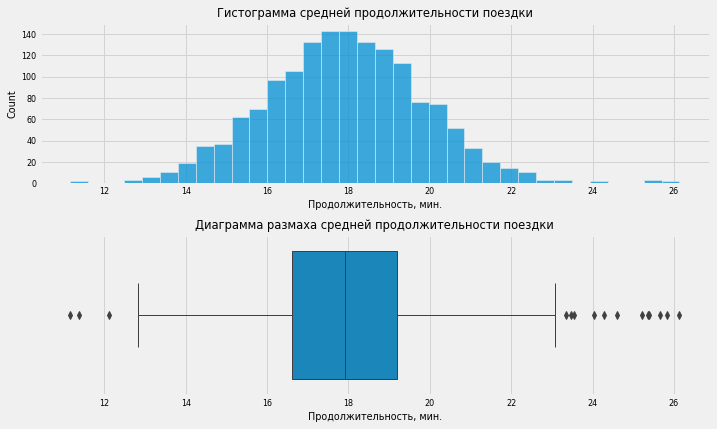

In [40]:
#Задаём сетку отрисовки графиков
plt.figure(figsize=(10, 6))

#Строим гистограмму распределения
ax1 = plt.subplot(2, 1, 1) 
sns.histplot(user_duration['duration'], ax=ax1);
plt.xlabel('Продолжительность, мин.')
plt.title('Гистограмма средней продолжительности поездки')

# строим график распределения значений
ax2 = plt.subplot(2, 1, 2) 
sns.boxplot(x='duration', data=user_duration, ax=ax2, linewidth=1)
plt.title('Диаграмма размаха средней продолжительности поездки')
plt.xlabel('Продолжительность, мин.')

plt.tight_layout()  #Команда для улучшения компоновки графиков
plt.show()

In [41]:
user_duration.describe()

,duration
count,1534.000000
mean,17.926440
std,1.971150
min,11.163431
25%,16.613880
50%,17.903937
75%,19.198581
max,26.136000


Для каждого пользователя посчитана средняя продолжительность поездки. Большинство значений средней продолжительности поездки для пользователя лежат в диапазоне от 16 до 19 минут. Максимальная средняя продолжительность поездки составила 26 минут, а минимальная средняя продолжительность поездки составила 11 минут. Значения свыше 23 минут, а также менее 13 минут достаточно редки. 

### Взаимосвязь расстояния и продолжительности поездок. 

Для столбцов, содержащих значения расстояний и продолжительности каждой поездки построим диаграмму рассеяния, посмотрим на взаимосвязи.

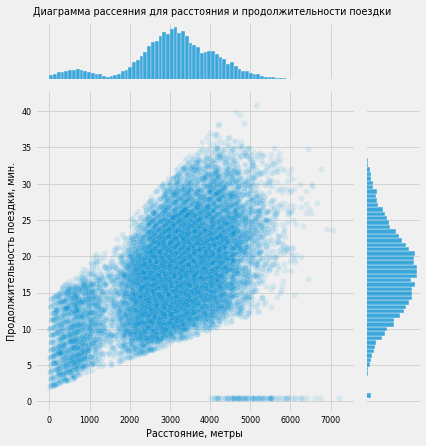

In [42]:
joint = sns.jointplot(x='distance', y='duration', data=rides, kind='scatter', alpha=0.1)
joint.set_axis_labels(
    xlabel='Расстояние, метры', 
    ylabel='Продолжительность поездки, мин.'
)
joint.fig.suptitle('Диаграмма рассеяния для расстояния и продолжительности поездки', y=1.02)
plt.show()

In [43]:
#Найдем Коэффициент корреляции Пирсона, посмотрим на наличие линейной связи

In [44]:
rides['distance'].corr(rides['duration'])

0.5367776552505346

Корреляция в 0.53 говорит о наличии связи, однако не слишком сильной. С увеличением расстояния увеличивается продолжительность поездки, но так бывает не всегда: к примеру, средняя средняя продолжительность поездки составляет 18 минут: за это время пользователи преодолевают расстояние от 1 до 6 км. Встрачаются случаи, когда за активное время от 2 до 14 минут самокаты стояли на месте. На графике определены странные случаи, когда за время около минуты самокаты преодолевают расстояние от 4 до 7 км: вероятно это ошибка электроники или програмного обеспечения. 

**Вывод:**

 - **Наиболее** популярен среди пользователей **Пятигорск - 219 человек** пользуются самокатами компании GoFast в этом городе-курорте. Незначительно отстают от Пятигорска города **Екатеринбург** и **Ростов-На-Дону: 204 и 198 пользователей**. Наименее популярна **Москва - 168 человек** используют в качестве передвижения или прогулок по городу. Среди представленных городов также присутствуют: **Краснодар, Сочи, Омск и Тюмень**.

 - Преобладающее большинство пользователей **без подписки: 54.4% (или 835 человек)**. **Подпиской пользуются 45.6% или 699 человек**.


 - Мы обладаем данными о **1534 уникальных пользователях приложения**. **Большинство** пользователей в возрасте **от 22 до 28 лет**. Половина пользователей самокатов в компании GoFast младше 25 лет, а другая половина старше 25 лет. Минимальный возраст пользователя 12 лет, максимальный возраст 43 года. Самый распространненный возраст пользователя - 25 лет, таких клиентов 145 человек, что составляет 9.5% от всех уникальных пользователей приложения.


 - Большинство поездок лежит в диапазоне **от 2500 метров до 3700 метров**. В среднем, расстояние, преодолеваемое пользователем составляет **3 км (или 3070 метров)**. Минимальное расстояние, преодолеваемое пользователем составляет менее метра (вероятно, речь идет о неисправном самокате, либо пользователь передумал). Максимальное расстояние, которое пользователь проехал составило 7 км и 200 метров, однако свыше 5.5 км поездки достаточно редки, и их количество незначительно, как и поездки на расстояния менее 750 метров (хотя очень короткие поездки случаются немного чаще, чем наиболее дальние).

 - Для каждого пользователя посчитано среднее преодолеваемое расстояние за поездку. Большинство значений среднего расстояния для пользователя лежат в диапазоне примерно от 2900 до 3300 метров. То есть, большинство пользователей в среднем проезжают от 2900 до 3300 метров за поездку. Минимальное среднее расстояние для пользователя составляет 1630 метрв, а максимальное среднее расстояние для пользователя составляет 4287 метра. Значения среднего расстояния для пользователя менее 2500 метров и свыше 3800 метров достаточно редки.

 - Медиана и среднее значения длительности поездок стремятся друг к другу, что означает, в данных присутствуют выбросы, но их количество не значительное. **В среднем, поездка длится почти 18 минут.** Большинство поездок длятся **от 14 до 22 минут.** Максимальная поездка составляла 40 минут, минимальная поездка составила полминуты. Около одной минуты на гистограмме заметен небольшой выброс: около ста человек завершили поездку за период менее минуты.

 - Для каждого пользователя посчитана средняя продолжительность поездки. Большинство значений средней продолжительности поездки для пользователя лежат в диапазоне от 16 до 19 минут. Максимальная средняя продолжительность поездки составила 26 минут, а минимальная средняя продолжительность поездки составила 11 минут. Значения свыше 23 минут, а также менее 13 минут достаточно редки.


 - Посчитан коэффициент корреляции Пирсона, который составил 0.53, что говорит о наличии линейной связи, однако не слишком сильной. С увеличением расстояния увеличивается продолжительность поездки, но так бывает не всегда: к примеру, средняя средняя продолжительность поездки составляет 18 минут: за это время пользователи преодолевают расстояние от 1 до 6 км. Встрачаются случаи, когда за активное время от 2 до 14 минут самокаты стояли на месте. На графике определены странные случаи, когда за время около минуты самокаты преодолевают расстояние от 4 до 7 км: вероятно это ошибка электроники или програмного обеспечения.

## Объединение данных.

Объединим данные о пользователях, поездках и подписках в один датафрейм. Используем метод `merge`.

In [45]:
df = rides.merge(users, on='user_id')
df.head(3)

,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra


In [46]:
#Проверим на наличие пропусков
df.isna().sum()

user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [47]:
#Проверяем на соответствие размера таблицы 
df.shape

(18068, 9)

In [48]:
df = df.merge(subs, on='subscription_type')
df

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


In [49]:
#Проверим на наличие пропусков
df.isna().sum()

user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [50]:
#Проверяем на соответствие размера таблицы 
df.shape

(18068, 12)

Пропуски отсутствуют. Размеры объединенных таблиц соответствуют ожиданиям.

Создадим датафрейм c данными о пользователях с подпиской и назовем его `df_ultra`.

In [51]:
df_ultra = df.loc[df['subscription_type'] == 'ultra']
df_ultra.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


Создадим датафрейм c данными о пользователях без подписки и назовем его `df_free`.

In [52]:
df_free = df.loc[df['subscription_type'] == 'free']
df_free.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


In [53]:
#Построим диаграммы размаха для пользователей тарифов.

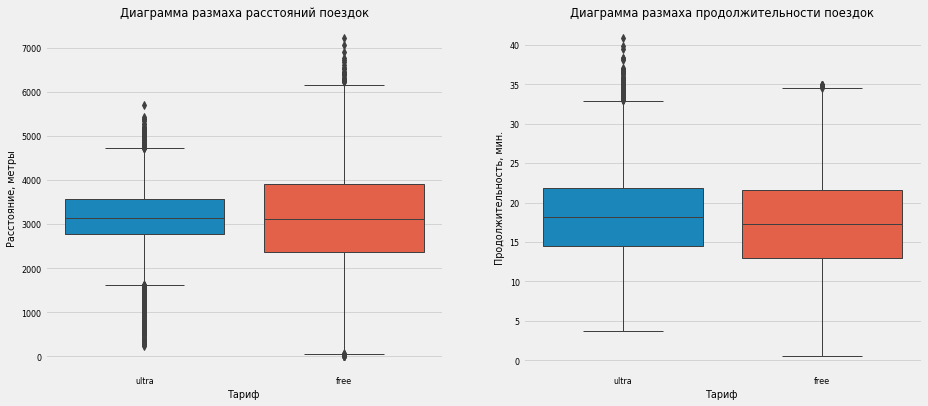

In [54]:
#Задаем сетку отрисовки графиков
plt.figure(figsize=(14, 6))

#Строим ящики с усами для данных о расстоянии в зависимости от тарифа пользователя
ax1 = plt.subplot(1, 2, 1)
sns.boxplot(x='subscription_type', y='distance', data=df, linewidth=1, ax=ax1) 
plt.xlabel('Тариф')
plt.ylabel('Расстояние, метры')
plt.title('Диаграмма размаха расстояний поездок')

#Строим ящики с усами для данных о продолжительности поездки в зависимости от тарифа пользователя
ax2 = plt.subplot(1, 2, 2)
sns.boxplot(x='subscription_type', y='duration', data=df, linewidth=1, ax=ax2)
plt.xlabel('Тариф')
plt.ylabel('Продолжительность, мин.')
plt.title('Диаграмма размаха продолжительности поездок')

plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Вот [тут](https://python-graph-gallery.com/39-hidden-data-under-boxplot/) можно посмотреть способы сделать ящики с усами информативнее, отличная визуализация, очень нравится мне

<div class="alert alert-info"> <b>Комментарий студента: </b>Спасибо!</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Рад нести пользу!)

</div>

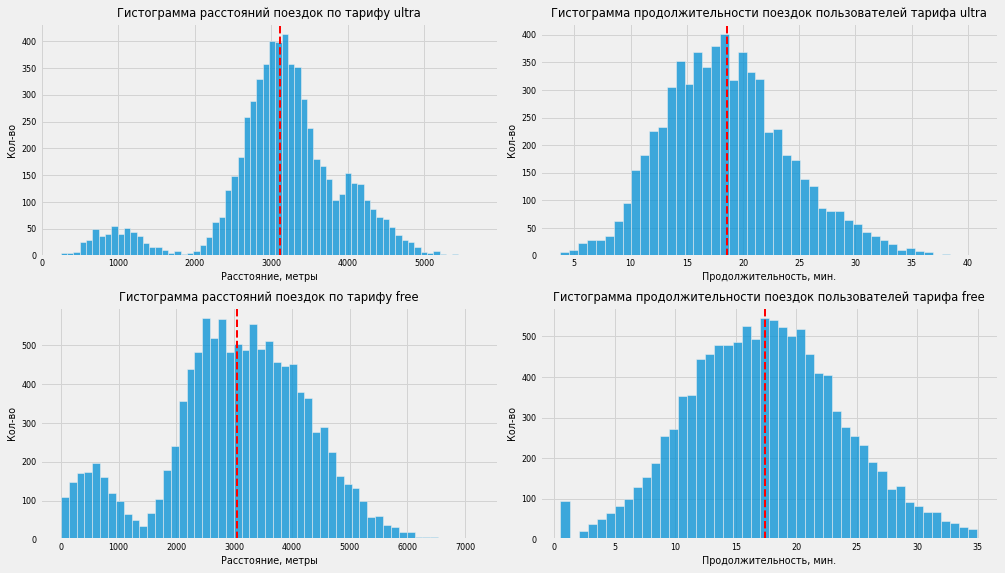

In [55]:
# Среднее значение расстояний поездок для тарифа ultra
mean_distance_ultra = df_ultra['distance'].mean()

# Среднее значение расстояний поездок для тарифа free
mean_distance_free = df_free['distance'].mean()

# Среднее значение продолжительности поездок для тарифа ultra
mean_duration_ultra = df_ultra['duration'].mean()

# Среднее значение продолжительности поездок для тарифа free
mean_duration_free = df_free['duration'].mean()

#Задаем сетку отрисовки графика
plt.figure(figsize=(14,8))

# Настройка вертикального расстояния между графиками
plt.subplots_adjust(hspace=0.4) 


#Строим гистограмму распределения
ax1 = plt.subplot(2, 2, 1)

sns.histplot(df_ultra['distance'], ax=ax1);
plt.axvline(mean_distance_ultra, color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Расстояние, метры')
plt.ylabel('Кол-во')
plt.title('Гистограмма расстояний поездок по тарифу ultra')


#Строим гистограмму распределения
ax2 = plt.subplot(2, 2, 2)
sns.histplot(df_ultra['duration'], ax=ax2);
plt.axvline(mean_duration_ultra, color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Расстояние, метры')
plt.xlabel('Продолжительность, мин.')
plt.ylabel('Кол-во')
plt.title('Гистограмма продолжительности поездок пользователей тарифа ultra')

#Строим гистограмму распределения
ax3 = plt.subplot(2, 2, 3)
sns.histplot(df_free['distance'], ax=ax3);
plt.axvline(mean_distance_free, color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Расстояние, метры')
plt.ylabel('Кол-во')
plt.title('Гистограмма расстояний поездок по тарифу free')

#Строим гистограмму распределения
ax4 = plt.subplot(2, 2, 4)
sns.histplot(df_free['duration'], ax=ax4);
plt.axvline(mean_duration_free, color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Продолжительность, мин.')
plt.ylabel('Кол-во')
plt.title('Гистограмма продолжительности поездок пользователей тарифа free')

plt.tight_layout()  #Команда для улучшения компоновки графиков
plt.show()

In [56]:
#Построим график плотности вероятности

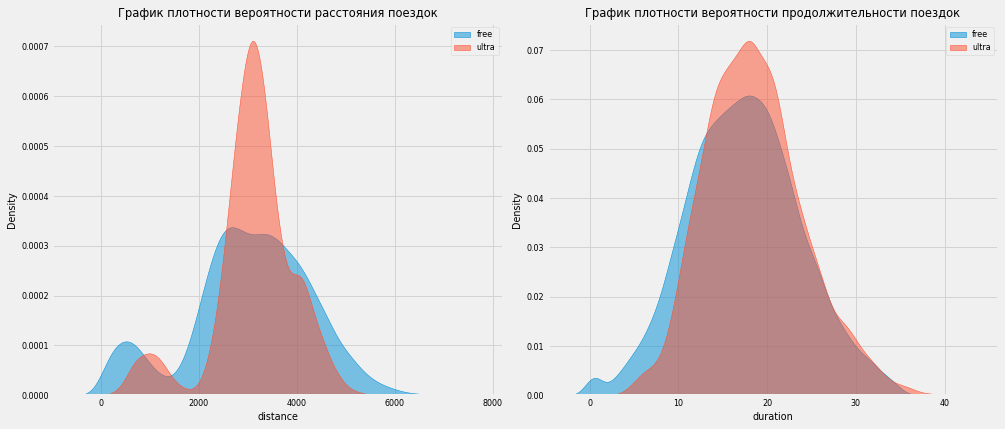

In [57]:
plt.figure(figsize=(14, 6))

ax1 = plt.subplot(1, 2, 1)
sns.kdeplot(df.loc[df['subscription_type'] == 'free', "distance"], shade=True, label="free", alpha=.5, ax=ax1)
sns.kdeplot(df.loc[df['subscription_type'] == 'ultra', "distance"], shade=True, label="ultra", alpha=.5, ax=ax1)
plt.title('График плотности вероятности расстояния поездок')
plt.legend();

ax2 = plt.subplot(1, 2, 2)
sns.kdeplot(df.loc[df['subscription_type'] == 'free', "duration"], shade=True, label="free", alpha=.5, ax=ax2)
sns.kdeplot(df.loc[df['subscription_type'] == 'ultra', "duration"], shade=True, label="ultra", alpha=.5, ax=ax2)
plt.title('График плотности вероятности продолжительности поездок')
plt.legend();

plt.tight_layout()  #Команда для улучшения компоновки графиков
plt.show();

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
* Отличное решение на одном графике визуализировать оба тарифа, так удобнее сравнивать 
* На графиках отлично смотрится среднее или медиана, как дополнительное опорной значение, вот [тут](https://stackoverflow.com/questions/12043672/how-to-take-draw-an-average-line-for-a-scatter-plot) можно посмотреть, как добавить такую визуализацию

<div class="alert alert-info"> <b>Комментарий студента: </b>Добавила. Благодарю за рекомендацию! </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Тебе спасибо за отзывчивость и внедрение рекомендаций

In [58]:
df_ultra[['distance', 'duration']].describe()

,distance,duration
count,6500.000000,6500.000000
mean,3115.445388,18.541985
std,836.895330,5.572048
min,244.210438,3.760353
25%,2785.444017,14.524654
50%,3148.637229,18.178153
75%,3560.574425,21.884129
max,5699.769662,40.823963


In [59]:
df_free[['distance', 'duration']].describe()

,distance,duration
count,11568.000000,11568.000000
mean,3045.495282,17.390909
std,1246.173806,6.326803
min,0.855683,0.500000
25%,2366.562689,12.958437
50%,3114.648465,17.326890
75%,3905.697894,21.594071
max,7211.007745,34.948498


**Вывод:**

 - **Гистограмма расстояний в разрезе тарифов**:

Разброс значений по тарифу **free** шире, чем по тарифу **ultra**, что проявлено на гистограмме и на графике плотности вероятности, а также подтверждается разницей в стандартных отклонениях. 

Для тарифа **ultra** большинство значений лежат в пределах от 2785 до 3560 метров, минимальная дистанция 244 метра, а максимальная 5700 метров, 99% всех поездок (границы усов) лежат примерерно в промежутке 1600 - 4800 метров, поездки дальностью больше 4800 метров редки, как и редки поездки дальностью менее 1600 метров.  

Для тарифа **free** большинство значений лежат в более широком диапазоне от 2366 до 3900 метров, с максимальной дистанцией 7211 метров. Для тарифа **free** характерны простои самокатов: более ста случаев завершения поездки с нулевой дистанцией, в то время как для тарифа **ultra** простои отсутствуют. 99% всех поездок (границы усов) по тарифу **free** лежат в диапазоне от 1 м. до 6100 м. Дистанции свыше 6100 метров уже редки и относятся к выбросам. Медиана для обоих тарифов лежит в районе 3100 метров.

 - **Гистограмма длительности поездок в разрезе тарифов**:

Гистограммы длительности поездок по тарифам **ultra** и **free** очень схожи, однако небольшие различия имеются. Разброс значений по тарифу **free** немного больше. Для тарифа **ultra** характерно отсутсвие поездок менее четырех минут, в то время как для тарифа **free** такие поездки случаются (в том числе наблюдаются ошибочные случаи поездок длительностью менее минуты на расстояние дальше 4 км.). Большинство поездок по тарифу **ultra** длятся от 14 до 22 минут, по тарифу **free** от 13 до 22 минут. Максимально продолжительная поездка принадлежит пользователю по тарифу **ultra** и составляет 40 минут. 

По тарифу **ultra**  99% всех поездок лежат в диапазоне от 4 до 33 минут, поездки менее 4 минут отсутствуют, а более 33 минут редки, но таковые есть. 

По тарифу **free**  99% всех поездок лежат в диапазоне от 1 до 35 минут, поездки дольше 35 минут отсутствуют.

По тарифу **ultra** медиана и среднее на одну минуту больше, чем у пользователей тарифа **free**.

## Подсчет выручки.

In [60]:
df.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными. Найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [61]:
df_agg = df.groupby(['user_id', 'month']).agg(
    {'distance':'sum', 
     'user_id':'count', 
     'duration':'sum', 
     'subscription_type':'first', 
     'minute_price':'first', 
     'start_ride_price':'first', 
     'subscription_fee':'first'}
)
df_agg.rename(columns={'user_id': 'count_rides'}, inplace=True)

#округлим продолжительность поездки
df_agg['duration'] = np.ceil(df_agg['duration']) 
df_agg.head(7)

distance  count_rides  duration subscription_type  \
user_id month                                                          
1       1       7027.511294            2      42.0             ultra   
        4        754.159807            1       7.0             ultra   
        8       6723.470560            2      45.0             ultra   
        10      5809.911100            2      32.0             ultra   
        11      7003.499363            3      54.0             ultra   
        12      6751.629942            2      28.0             ultra   
2       3      10187.723006            3      61.0             ultra   

               minute_price  start_ride_price  subscription_fee  
user_id month                                                    
1       1                 6                 0               199  
        4                 6                 0               199  
        8                 6                 0               199  
        10                6                 0               199  
        11                6                 0               199  
        12                6                 0               199  
2       3                 6                 0               199

Добавим столбец с помесячной выручкой, которую принёс каждый пользователь. 

Рассчитаем помесячную выручку по формуле: **стоимость старта поездки** ×  **количество поездок** + **стоимость одной минуты поездки** × **общая продолжительность всех поездок** в минутах + **стоимость подписки.**


In [62]:
df_agg['total_revenue'] = df_agg['start_ride_price'] * df_agg['count_rides'] + (
    df_agg['duration'] * df_agg['minute_price']
) + df_agg['subscription_fee']

In [63]:
df_agg.head(3)

distance  count_rides  duration subscription_type  \
user_id month                                                         
1       1      7027.511294            2      42.0             ultra   
        4       754.159807            1       7.0             ultra   
        8      6723.470560            2      45.0             ultra   

               minute_price  start_ride_price  subscription_fee  total_revenue  
user_id month                                                                   
1       1                 6                 0               199          451.0  
        4                 6                 0               199          241.0  
        8                 6                 0               199          469.0

**Вывод:** добавлен столбец `total_revenue`, содержащий помесячную выручку с каждого пользователя. 

## Проверка гипотез

### Тратят ли пользователи с подпиской больше времени на поездки.

Если  пользователи с подпиской тратят больше времени на поездки, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

In [64]:
df.head(3)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199


Сформулируем гипотезы:

-  H0: Средние значения продолжительности поездок для пользователей тарифа ultra и free равны.

-  H1: Среднее значение продолжительности поездки для пользователей тарифа ultra больше, чем среднее значение продолжительности поездки для пользователей тарифа free.

In [65]:
#для каждого пользователя тарифа ultra найдем среднюю продолжительность поездки
ultra = df.loc[df['subscription_type'] == 'ultra', 'duration']

In [66]:
#для каждого пользователя тарифа free найдем среднюю продолжительность поездки
free = df.loc[df['subscription_type'] == 'free', 'duration']

In [67]:
# задаём уровень значимости
alpha = 0.05

In [68]:
# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(ultra, free, alternative='greater', equal_var=False)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 5.6757813771289775e-37
Отвергаем нулевую гипотезу


**Вывод**: Есть основания говорить, что средняя продолжительности поездки у пользователей с подпиской по тарифу `ultra` больше, чем у пользователей без подписки (по тарифу free).


### Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку не превышает 3130 метров

Сформулируем гипотезы:

 - H1: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку равно 3130 метров.

 - H2: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку больше 3130 метров.

In [69]:
df.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [70]:
#Для каждого пользователя найдем среднее расстояние за одну поездку.

In [87]:
mean_distance = df.query('subscription_type == "ultra"').groupby('user_id')['distance'].mean()
mean_distance.mean()

3113.459926039899

In [72]:
interested_distance = 3130

alpha = 0.05 #уровень статистической значимости

results = st.ttest_1samp(
    mean_distance, 
    interested_distance,
    alternative='greater') # используем метод st.ttest_1samp

print('p-значение:', results.pvalue) 

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9275041260050892
Не получилось отвергнуть нулевую гипотезу


**Вывод**: Есть основания говорить, что среднее расстояние, которое пользователи с подпиской проезжают за одну поездку не превышает 3130 метров.

### Будет ли выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Сформулируем гипотезы:

 - H1: Помесячные выручки от пользователей с подпиской и без подписки равны.
 
 - H0: Помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки


In [73]:
#Создадим переменные, содержащие помесяные выручки для пользователей тарифов ultra и free

In [74]:
ultra_revenue = df_agg.query('subscription_type == "ultra"')
ultra_revenue = ultra_revenue['total_revenue']

In [75]:
free_revenue = df_agg.query('subscription_type == "free"')
free_revenue = free_revenue['total_revenue']

In [76]:
# задаём уровень значимости
alpha = 0.05

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(ultra_revenue, free_revenue, alternative='greater', equal_var=False)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.0718729651261336e-44
Отвергаем нулевую гипотезу


**Вывод**: Есть основания предполагать, что помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки.

### Выбор теста для проверки гипотезы о снижении количества обращений.

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Будем использовать метод `scipy.stats.ttest_rel()`

## Распределения

### Минимальное число промокодов для продления подписки

Отделу маркетинга GoFast поставлена задача: 

провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 
10 % пользователей. 

Выясним, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберем параметры распределения, описывающего эту ситуацию, построим график распределения и сформулируем ответ на вопрос о количестве промокодов.

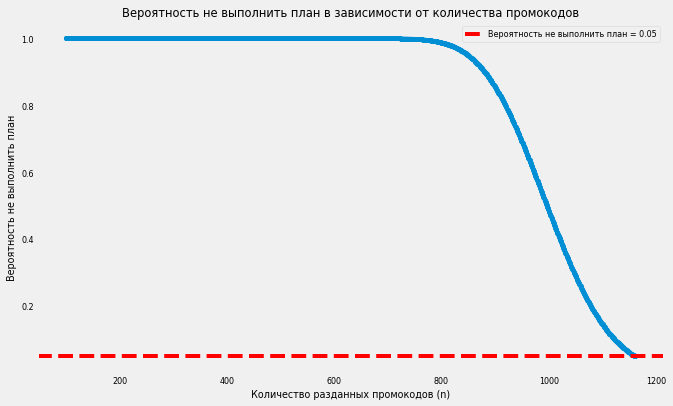

Минимальное количество промокодов, которое нужно разослать: 1161


In [77]:
p = 0.1  # Вероятность продления подписки
k = 100  # Минимальное количество клиентов, которые должны продлевать подписку
p_expected = 0.05  # Желаемая вероятность не выполнить план

n = k
distr = []  # Список для хранения вероятностей

while True:
    d = binom.cdf(k - 1, n, p)
    distr.append(d)
    if d <= p_expected:
        break
    n += 1

# Cтрим график распределения
plt.figure(figsize=(10, 6))
plt.plot(range(k, n + 1), distr, marker='o', linestyle='-', markersize=4)
plt.axhline(p_expected, color='red', linestyle='--', label=f'Вероятность не выполнить план = {p_expected}')
plt.xlabel("Количество разданных промокодов (n)")
plt.ylabel("Вероятность не выполнить план")
plt.title("Вероятность не выполнить план в зависимости от количества промокодов")
plt.legend()
plt.grid()
plt.show()

print(f"Минимальное количество промокодов, которое нужно разослать: {n}")

Построим столбчатую диаграмму, где по горизонтальной оси отображаются значения k (количество успехов, или количество клиентов, которые должны продлевать подписку), а по вертикальной оси - соответствующие вероятности.

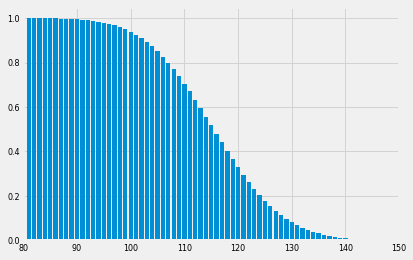

In [78]:
n = 1161 # количество попыток
p = 0.1 # вероятность успеха

distr = []

for k in range(0, n + 1):
    current_value = 1-binom.cdf(k, n, p)
    distr.append(current_value)
    
plt.bar(range(0, n + 1), distr)
plt.xlim(80, 150)
plt.show()

**Вывод:** Минимальное количество промокодов, которое нужно разослать: 1161. 

### График распределения

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. 

Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [79]:
#Аппроксимируем биномиальное распределение нормальным и посчитаем

In [80]:
# задаём параметры биномиального распределения
n = 1000000
p = 0.4

# задаём параметры нормального распределения равными
# мат.ожиданию и дисперсии биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 399.5 пользователей
result = distr.cdf(399500)
print(result)

0.15371708296369768


**Вывод:** 15.3% вероятность того, что уведомление откроют не более 399500 пользователей.

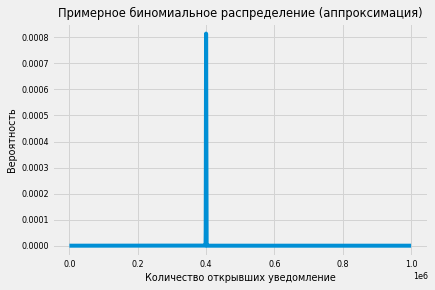

In [81]:

# Генерируем значения для графика
x = range(0, n+1)  # Все возможные значения от 0 до n
y = [distr.pdf(value) for value in x]

# Строим график
plt.plot(x, y)
plt.title("Примерное биномиальное распределение (аппроксимация)")
plt.xlabel("Количество открывших уведомление")
plt.ylabel("Вероятность")
plt.grid(True)
plt.show()

In [82]:
#Строим графики

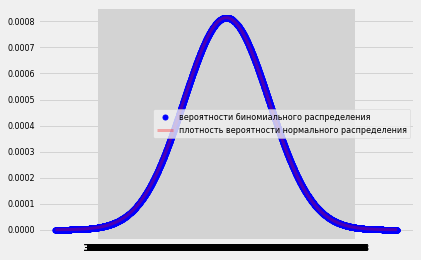

Условие выполняется


In [83]:
# зададим функцию, которая выдаёт <num> чисел,
# равномерно распределённых от <start> до <stop>
# (понадобится для визуализации нормального распределения)
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result
 
# задаём параметры биномиального распределения
n = 1000000
p = 0.4

# границы промежутка, в котором будем строить аппроксимацию -
# от n*p минус 4 ст.отклонения бином.распределения
# до n*p плюс 4 ст.отклонения бином.распределения
# (там, где вероятности значений почти не равны нулю)
left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))
 
# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))
# рисуем график биномиального распределения
ax = plt.subplot()
# используем синие о-образные маркеры и размер маркера 5
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5,
    label='вероятности биномиального распределения')

# зададим параметры нормального распределения равными
# мат.ожиданию и дисперсии биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))
 
# рисуем график нормального распределения:
# получим список из 100 чисел от left до right
x = linspace(left, right, 100)
# используем красную линию ширины 3 и прозрачности 0.3

ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.3, label='плотность вероятности нормального распределения')
 
# зададим подписи по оси x в пределах ± 3 ст.отклонений от мат.ожидания
# (последний аргумент в методе range - интервал между подписями)
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 1))
ax.set_xticks(x_ticks)

# настраиваем оптимальное расположение легенды и выводим график
ax.legend(loc='best')
plt.show()

# выводим, выполняется ли наше условие аппроксимации:
# лежит ли mu ± 3 sigma в промежутке от 0 до n:
if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('Условие выполняется')
else:
    print('Условие не выполняется')

## Общий вывод:

<p></p>

<div style="border:solid green 2px; padding: 20px">  
    
 **1. Обзор данных.**
    
  Произведено первичное ознакомление с данными. 

  Таблица `users` с данными о пользователях содержит 5 столбцов и 1565 строк, пропуски отсутствуют, типы данных  соответствуют содержанию столбцов.

  Таблица `rides` с данными о поездках содержит 4 столбца и 18068 строк, пропуски отсутствуют. Столбец date содержит дату в текстовом формате, в дальнейшем необходимо привести к типу данных datetime.

  Таблица `subs` с данными о подписках содержит 4 столбца и всего 2 строки, пропуски отсутствуют, типы данных соответствуют содержанию столбцов.
    
    
 
 **2. Предобработка данных.**
    
 Произведена предобработка данных. 
Столбец `date` приведен к типу даты, на основе указанного столбца создан столбец `month`, содержащий номер месяца.
Обработаны дубликаты в таблице `users`, в остальных датасетах дубликаты отсутствуют.
    
    
 **3.  Исследовательский анализ данных.**
    
- **Наиболее** популярен среди пользователей **Пятигорск - 219 человек** пользуются самокатами компании GoFast в этом городе-курорте. Незначительно отстают от Пятигорска города **Екатеринбург** и **Ростов-На-Дону: 204 и 198 пользователей**. Наименее популярна **Москва - 168 человек** используют в качестве передвижения или прогулок по городу. Среди представленных городов также присутствуют: **Краснодар, Сочи, Омск и Тюмень**.

 - Преобладающее большинство пользователей **без подписки: 54.4% (или 835 человек)**. **Подпиской пользуются 45.6% или 699 человек**.


 - Мы обладаем данными о **1534 уникальных пользователях приложения**. **Большинство** пользователей в возрасте **от 22 до 28 лет**. Половина пользователей самокатов в компании GoFast младше 25 лет, а другая половина старше 25 лет. Минимальный возраст пользователя 12 лет, максимальный возраст 43 года. Самый распространненный возраст пользователя - 25 лет, таких клиентов 145 человек, что составляет 9.5% от всех уникальных пользователей приложения.


 - Большинство поездок лежит в диапазоне **от 2500 метров до 3700 метров**. В среднем, расстояние, преодолеваемое пользователем составляет **3 км (или 3070 метров)**. Минимальное расстояние, преодолеваемое пользователем составляет менее метра (вероятно, речь идет о неисправном самокате, либо пользователь передумал). Максимальное расстояние, которое пользователь проехал составило 7 км и 200 метров, однако свыше 5.5 км поездки достаточно редки, и их количество незначительно, как и поездки на расстояния менее 750 метров (хотя очень короткие поездки случаются немного чаще, чем наиболее дальние).

 - Для каждого пользователя посчитано среднее преодолеваемое расстояние за поездку. Большинство значений среднего расстояния для пользователя лежат в диапазоне примерно от 2900 до 3300 метров. То есть, большинство пользователей в среднем проезжают от 2900 до 3300 метров за поездку. Минимальное среднее расстояние для пользователя составляет 1630 метрв, а максимальное среднее расстояние для пользователя составляет 4287 метра. Значения среднего расстояния для пользователя менее 2500 метров и свыше 3800 метров достаточно редки.

 - Медиана и среднее значения длительности поездок стремятся друг к другу, что означает, в данных присутствуют выбросы, но их количество не значительное. **В среднем, поездка длится почти 18 минут.** Большинство поездок длятся **от 14 до 22 минут.** Максимальная поездка составляла 40 минут, минимальная поездка составила полминуты. Около одной минуты на гистограмме заметен небольшой выброс: около ста человек завершили поездку за период менее минуты.

 - Для каждого пользователя посчитана средняя продолжительность поездки. Большинство значений средней продолжительности поездки для пользователя лежат в диапазоне от 16 до 19 минут. Максимальная средняя продолжительность поездки составила 26 минут, а минимальная средняя продолжительность поездки составила 11 минут. Значения свыше 23 минут, а также менее 13 минут достаточно редки.


 - Посчитан коэффициент корреляции Пирсона, который составил 0.53, что говорит о наличии линейной связи, однако не слишком сильной. С увеличением расстояния увеличивается продолжительность поездки, но так бывает не всегда: к примеру, средняя средняя продолжительность поездки составляет 18 минут: за это время пользователи преодолевают расстояние от 1 до 6 км. Встрачаются случаи, когда за активное время от 2 до 14 минут самокаты стояли на месте. На графике определены странные случаи, когда за время около минуты самокаты преодолевают расстояние от 4 до 7 км: вероятно это ошибка электроники или програмного обеспечения.    
    
 
 **4. Объединение данных.**
    
 - **Гистограмма расстояний в разрезе тарифов**:

Разброс значений по тарифу **free** шире, чем по тарифу **ultra**, что проявлено на гистограмме и на графике плотности вероятности, а также подтверждается разницей в стандартных отклонениях. 

Для тарифа **ultra** большинство значений лежат в пределах от 2785 до 3560 метров, минимальная дистанция 244 метра, а максимальная 5700 метров, 99% всех поездок (границы усов) лежат примерерно в промежутке 1600 - 4800 метров, поездки дальностью больше 4800 метров редки, как и редки поездки дальностью менее 1600 метров.  

Для тарифа **free** большинство значений лежат в более широком диапазоне от 2366 до 3900 метров, с максимальной дистанцией 7211 метров. Для тарифа **free** характерны простои самокатов: более ста случаев завершения поездки с нулевой дистанцией, в то время как для тарифа **ultra** простои отсутствуют. 99% всех поездок (границы усов) по тарифу **free** лежат в диапазоне от 1 м. до 6100 м. Дистанции свыше 6100 метров уже редки и относятся к выбросам. Медиана для обоих тарифов лежит в районе 3100 метров.

 - **Гистограмма длительности поездок в разрезе тарифов**:

Гистограммы длительности поездок по тарифам **ultra** и **free** очень схожи, однако небольшие различия имеются. Разброс значений по тарифу **free** немного больше. Для тарифа **ultra** характерно отсутсвие поездок менее четырех минут, в то время как для тарифа **free** такие поездки случаются (в том числе наблюдаются ошибочные случаи поездок длительностью менее минуты на расстояние дальше 4 км.). Большинство поездок по тарифу **ultra** длятся от 14 до 22 минут, по тарифу **free** от 13 до 22 минут. Максимально продолжительная поездка принадлежит пользователю по тарифу **ultra** и составляет 40 минут. 

По тарифу **ultra**  99% всех поездок лежат в диапазоне от 4 до 33 минут, поездки менее 4 минут отсутствуют, а более 33 минут редки, но таковые есть. 

По тарифу **free**  99% всех поездок лежат в диапазоне от 1 до 35 минут, поездки дольше 35 минут отсутствуют.

По тарифу **ultra** медиана и среднее на одну минуту больше, чем у пользователей тарифа **free**. 
    
    
 **5.  Подсчёт выручки.**
    
Добавлен столбец `total_revenue`, содержащий помесячную выручку с каждого пользователя.     
    
 **6.  Проверка гипотез.**
    
По результатам проверки гипотез есть основания полагать, что:
    
 - средняя продолжительности поездки у пользователей с подпиской по тарифу `ultra` больше, чем у пользователей без подписки (по тарифу free);
 - среднее расстояние, которое пользователи с подпиской проезжают за одну поездку не превышает 3130 метров;   
 - помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки.
    
    
**7. Вероятности.**
    
Минимальное количество промокодов для рассылки: 1161;
    
Вероятность того, что уведомление откроют не более 399500 пользователей составляет 15.3%
</div>  